In [2]:
import os

## 레이블 파일을 읽어와 기존에 있었던 레이블2를 넘기고 0, 1 레이블만 저장 -> 레이블2 삭제하기
def label_editor(
    oldpath ="C:/Users/R/Desktop/label/old",
    newpath ="C:/Users/R/Desktop/label/new"
):
    for file in os.listdir(oldpath):
        labels=[]
        with open(os.path.join(oldpath,file),"r")as f:
            for line in f.readlines():
                if line.split(" ")[0]=="2":
                    continue
                label = []
                ele = line.strip().split(" ")
                clc = ele[0]
                x = ele[1]
                y = ele[2]
                w = ele[3]
                h = ele[4]
                label = [clc, x, y, w, h]
                labels.append(label)
                
        with open(os.path.join(newpath,file),"w")as f:
            for line in labels:
                f.write(str(line[0])+" ")
                f.write(str(line[1])+" ")
                f.write(str(line[2])+" ")
                f.write(str(line[3])+" ")
                f.write(str(line[4])+"\n")
            
            
        
        

In [3]:
oldpath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\labels" ## 수정해야할 라벨파일이 있는 폴더 경로
newpath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\labels_" ## 수정하고 같은이름으로 저장 하고자 하는 폴더 경로

In [4]:
label_editor(oldpath=oldpath, newpath=newpath) ## 함수실행

In [5]:
## 라벨 수정 후 수정전일과 수정후파일 파일이름 비교, True 나와야함
old = os.listdir(oldpath)
new = os.listdir(newpath)

print(new == old)

True


In [4]:
## 오픈소스파일 0(no_helmet), 1(helmet) 라벨수 계산
import os

no_cnt = 0
h_cnt = 0
for file in os.listdir(newpath):
    with open(os.path.join(newpath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            else:
                h_cnt +=1
                
print("no_helmet:{}     |      helmat:{} ".format(no_cnt,h_cnt))
            
            
        

no_helmet:6677     |      helmat:19747 


In [6]:
## 수정된 된 라벨 파일 라벨 2 제거 됐는지 확인

imgpath = r"C:\Users\leeyj\Desktop\test123\images"
lbspath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\labels_"
wrong_labels = 0
for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.split(" ")[0]
            if cls == "2":
                wrong_labels+=1
                
print("wrong_labels:{}".format(wrong_labels))

wrong_labels:0


In [12]:
## 데이터 레이블 imbalance 문제 해결(헬멧 착용만 있는 레이블 파일 헬멧 미착용 수와 레이블수와 맞춰 이미지파일과 레이블파일 조정)
imgpath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\images"
lbspath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\labels"

num = 13070  ## no_helmet:6677     |      helmat:19747: 헬멧착용 레이블이 헬멧미착용 레이블보다 13070개 많음 
count=0

## 13070 많은 만큼 삭제하고 break로 loop 종료
for image, label in zip(os.listdir(imgpath),os.listdir(lbspath)):
    line_length=0
    helmet_count=0
    with open(os.path.join(lbspath,label),"r")as f:
        for line in f.readlines():
            line_length=line_length+1
            cls = line.strip().split(" ")[0]
            if cls == "1":
                helmet_count +=1
                
                
    if line_length==helmet_count:
        count = count+helmet_count
        os.remove(os.path.join(imgpath,image))
        os.remove(os.path.join(lbspath,label))
            

    if count>13070:
        break

In [14]:
## 임발란스 해결 후 헬멧과 노헬멧 레이블수 확인 
imgpath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\images"
lbspath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\labels"

no_cnt = 0
h_cnt = 0
for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            else:
                h_cnt +=1
                
print("no_helmet:{}     |      helmat:{} ".format(no_cnt,h_cnt))

no_helmet:6677     |      helmat:6676 


In [12]:
## 레이블 조정후 레이블과 사진파일 이름 같은지 확인 
import os

imgpath = r"C:\Users\leeyj\Desktop\test123\images"
lbspath = r"C:\Users\leeyj\Desktop\test123\labels"

imgs = os.listdir(imgpath)
lbs = os.listdir(lbspath)

imgs_name_list=[]
lbs_name_list=[]
for img in imgs:
    imgs_name_list.append(img.replace(".jpg",""))
    
for lb in lbs:
    lbs_name_list.append(lb.replace(".txt",""))
    
print(imgs_name_list== lbs_name_list)
    

True


In [9]:
## 기존에 레이블2가 있었으나 삭제후 레이블:2 있는지 확인
imgpath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\images"
lbspath = r"C:\Users\R\Desktop\로보플로우 헬멧데이터\labels_"
wrong_labels = 0
for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.split(" ")[0]
            if cls == "2":
                wrong_labels+=1
                
print("wrong_labels:{}".format(wrong_labels))

wrong_labels:0


In [4]:
imgs_save_path = "C:/Users/R/Desktop/test/images_aug/"
lbs_save_path = "C:/Users/R/Desktop/test/labels_aug/"

In [5]:
imgpath = os.listdir(imgs_save_path)
lbspath = os.listdir(lbs_save_path)

print(len(imgpath))
print(len(lbspath))
for image, label in zip(imgpath,lbspath):
    img_name = image.replace(".jpg","")
    lb_name = label.replace(".txt","")
    
    if img_name!=lb_name:
        print("파일이름: {}".format(lb_name))
    else:
        print("이미지와 라벨 완벽히 매칭")
        break


        


864
864
이미지와 라벨 완벽히 매칭


no_helmet: 2371
helmet: 2497
earphone: 0
headphone: 2440

총 label 수: 7308


<BarContainer object of 4 artists>

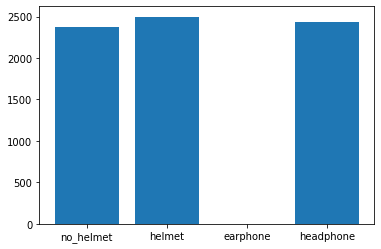

In [4]:
## 데이터셋 라벨수 세기
import os
import matplotlib.pyplot as plt

path = r"C:\Users\R\Desktop\정면 없는 이어폰\labels"

no_cnt = 0
h_cnt = 0
earphone_cnt = 0
headphone_cnt = 0
for file in os.listdir(path):
    with open(os.path.join(path,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            elif cls=="2":
                earphone_cnt+=1   
            elif cls=="3":
                headphone_cnt+=1 
            else:
                h_cnt +=1

             
print("no_helmet: {}\nhelmet: {}\nearphone: {}\nheadphone: {}\n".format(no_cnt, h_cnt, earphone_cnt,headphone_cnt))
print("총 label 수: {}".format(earphone_cnt+no_cnt+h_cnt+headphone_cnt))
plt.bar(x=["no_helmet","helmet","earphone","headphone"],height=[no_cnt,h_cnt,earphone_cnt,headphone_cnt])
# plt.savefig("lbscnt_final.png")



no_helmet: 2202     |      helmat: 2497       |     earphone: 2109


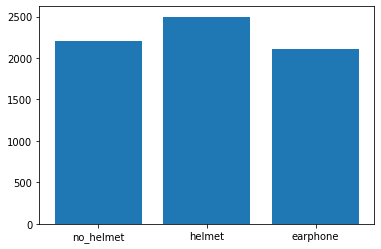

In [7]:
## 데이터셋 라벨수 세기
import os
import matplotlib.pyplot as plt

path = r"C:\Users\R\Desktop\ourdata\labels"
imgpath = r"C:\Users\R\Desktop\roboflow\images"
lbspath = r"C:\Users\R\Desktop\roboflow\labels"

no_cnt = 0
h_cnt = 0
for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            else:
                h_cnt +=1

earphone_cnt = 0
for file in os.listdir(path):
    with open(os.path.join(path,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            elif cls=="2":
                earphone_cnt+=1   
            else:
                h_cnt +=1

             
print("no_helmet: {}     |      helmat: {}       |     earphone: {}".format(no_cnt, h_cnt, earphone_cnt))

plt.bar(x=["no_helmet","helmet","earphone"],height=[no_cnt,h_cnt,earphone_cnt])
#plt.savefig("labelcount3.png")

In [37]:
## 기존 데이터셋 2500 레이블로 맞춰주기

imgpath = r"C:\Users\R\Desktop\roboflow\images"
lbspath = r"C:\Users\R\Desktop\roboflow\labels"

## 총레이블수 구하기
no_helmet = 1671
helmet = 1003



for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_helmet+=1
            else:
                helmet +=1



for image, label in zip(os.listdir(imgpath),os.listdir(lbspath)):
    line_length=0
    ##라벨파일에 있는 라벨 수 구하기
    h_cnt = 0
    no_cnt = 0
    with open(os.path.join(lbspath,label),"r")as f:
        for line in f.readlines():
            line_length=line_length+1
            cls = line.strip().split(" ")[0]
            if cls == "1":
                h_cnt +=1
            if cls == "0":
                no_cnt +=1
                
                
    if line_length==h_cnt:
        helmet = helmet - h_cnt
        os.remove(os.path.join(imgpath,image))
        os.remove(os.path.join(lbspath,label))
        
    elif line_length==no_cnt:  
        no_helmet = no_helmet - no_cnt  
        os.remove(os.path.join(imgpath,image))
        os.remove(os.path.join(lbspath,label))
           

    if no_helmet<=2500 and helmet<=2500:
        break

In [44]:
imgpath = r"C:\Users\R\Desktop\roboflow\images"
lbspath = r"C:\Users\R\Desktop\roboflow\labels"

no_cnt = 0
h_cnt = 0
for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            else:
                h_cnt +=1

print("no_helmet: {}     |      helmet: {}".format(no_cnt, h_cnt))

no_helmet: 531     |      helmet: 1494


In [ ]:
imgpath = r"C:\Users\R\Desktop\roboflow\images"
lbspath = r"C:\Users\R\Desktop\roboflow\labels"

## 총레이블수 구하기
no_helmet = 1671
helmet = 1003



for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_helmet+=1
            else:
                helmet +=1



for image, label in zip(os.listdir(imgpath),os.listdir(lbspath)):
    line_length=0
    ##라벨파일에 있는 라벨 수 구하기
    h_cnt = 0
    no_cnt = 0
    with open(os.path.join(lbspath,label),"r")as f:
        for line in f.readlines():
            line_length=line_length+1
            cls = line.strip().split(" ")[0]
            if cls == "1":
                h_cnt +=1
            if cls == "0":
                no_cnt +=1
                
                
    if line_length==h_cnt:
        helmet = helmet - h_cnt
        os.remove(os.path.join(imgpath,image))
        os.remove(os.path.join(lbspath,label))
        
    elif line_length==no_cnt:  
        no_helmet = no_helmet - no_cnt  
        os.remove(os.path.join(imgpath,image))
        os.remove(os.path.join(lbspath,label))
           

    if no_helmet<=2500 and helmet<=2500:
        break

In [48]:
imgpath = r"C:\Users\R\Desktop\roboflow\images"
lbspath = r"C:\Users\R\Desktop\roboflow\labels"

## 총레이블수 구하기
no_helmet = 1671
helmet = 1003



for file in os.listdir(lbspath):
    with open(os.path.join(lbspath,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_helmet+=1
            else:
                helmet +=1



for image, label in zip(os.listdir(imgpath),os.listdir(lbspath)):
    ##라벨파일에 있는 라벨 수 구하기
    h_cnt = 0
    no_cnt = 0
    with open(os.path.join(lbspath,label),"r")as f:
        for line in f.readlines():
            line_length=line_length+1
            cls = line.strip().split(" ")[0]
            if cls == "1":
                h_cnt +=1
            if cls == "0":
                no_cnt +=1
                
                
    
    os.remove(os.path.join(imgpath,image))
    os.remove(os.path.join(lbspath,label))
    
    helmet = helmet - h_cnt
    no_helmet = no_helmet - no_cnt
           

    if no_helmet<=2500 and helmet<=2500:
        break

In [1]:
os.renames("f210.jpg","f2022.jpg")

In [16]:
imgpath = "C:/Users/R/Desktop/images/"
lbspath = "C:/Users/R/Desktop/labels/"
len(os.listdir(imgpath)) == len(os.listdir(lbspath))
os.listdir(imgpath)

['f210.jpg',
 'f211.jpg',
 'f212.jpg',
 'f213.jpg',
 'f214.jpg',
 'f215.jpg',
 'f216.jpg',
 'f217.jpg',
 'f218.jpg',
 'f219.jpg',
 'f220.jpg',
 'f221.jpg',
 'f222.jpg',
 'f223.jpg',
 'f224.jpg',
 'f226.jpg',
 'f227.jpg',
 'f228.jpg',
 'f229.jpg',
 'f230.jpg',
 'f231.jpg',
 'f232.jpg',
 'f233.jpg',
 'f234.jpg',
 'f235.jpg',
 'f236.jpg',
 'f237.jpg',
 'f238.jpg',
 'f239.jpg',
 'f240.jpg',
 'f241.jpg',
 'f242.jpg',
 'f243.jpg',
 'f244.jpg',
 'f245.jpg',
 'f246.jpg',
 'f247.jpg',
 'f248.jpg',
 'f249.jpg',
 'f250.jpg',
 'f251.jpg',
 'f252.jpg',
 'f254.jpg',
 'f255.jpg',
 'f256.jpg',
 'f257.jpg',
 'f258.jpg',
 'f259.jpg',
 'f260.jpg',
 'f261.jpg',
 'f262.jpg',
 'f263.jpg',
 'f264.jpg',
 'f265.jpg',
 'f266.jpg',
 'f267.jpg',
 'f268.jpg',
 'f269.jpg',
 'f270.jpg',
 'f271.jpg',
 'f272.jpg',
 'f273.jpg',
 'f274.jpg',
 'f275.jpg',
 'f276.jpg',
 'f277.jpg',
 'f278.jpg',
 'f279.jpg',
 'f280.jpg',
 'f281.jpg',
 'f282.jpg',
 'f283.jpg',
 'f284.jpg',
 'f285.jpg',
 'f286.jpg',
 'f287.jpg',
 'f288.jpg',

In [17]:
name = "f_woo_"
i = 1
for image, label in zip(os.listdir(imgpath),os.listdir(lbspath)):
    os.renames(imgpath+image,imgpath+name+str(i)+".jpg")
    os.renames(lbspath+label,lbspath+name+str(i)+".txt")
    i = i+1

no_helmet: 0
helmet: 0
earphone: 508
headphone: 0

총 label 수: 508


<BarContainer object of 4 artists>

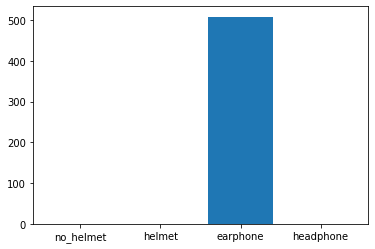

In [6]:
import os
import matplotlib.pyplot as plt

path = r"C:\Users\R\Desktop\test\o_l"

no_cnt = 0
h_cnt = 0
earphone_cnt = 0
headphone_cnt = 0
for file in os.listdir(path):
    with open(os.path.join(path,file), "r")as f:
        for line in f.readlines():
            cls = line.strip().split(" ")[0]
            if cls == "0":
                no_cnt+=1
            elif cls=="2":
                earphone_cnt+=1   
            elif cls=="3":
                headphone_cnt+=1 
            else:
                h_cnt +=1

             
print("no_helmet: {}\nhelmet: {}\nearphone: {}\nheadphone: {}\n".format(no_cnt, h_cnt, earphone_cnt,headphone_cnt))
print("총 label 수: {}".format(earphone_cnt+no_cnt+h_cnt+headphone_cnt))
plt.bar(x=["no_helmet","helmet","earphone","headphone"],height=[no_cnt,h_cnt,earphone_cnt,headphone_cnt])